# Trabajo Práctico: Modelado Comparativo en Minería de Datos (Regresión)

En este trabajo vamos a analizar un dataset que contiene información sobre hábitos de estudiantes universitarios y su rendimiento académico.  
El objetivo de este notebook es aplicar técnicas de minería de datos para construir un modelo de **regresión** que permita predecir una **variable continua** (el puntaje de examen) a partir del resto de los datos.

## Importación de librerias

Antes de empezar, importamos todas las librerías que vamos a necesitar para el análisis, la visualización y el modelado.


In [7]:
# Manejo de datos
import pandas as pd          # para trabajar con datos en forma de tabla
import numpy as np           # para operaciones numéricas

# Visualización
import matplotlib.pyplot as plt   # para hacer gráficos
import seaborn as sns             # para gráficos más completos

# Preprocesamiento
from sklearn.preprocessing import StandardScaler, LabelEncoder  # para preparar los datos
from sklearn.model_selection import train_test_split            # para dividir en train y test
from sklearn.decomposition import PCA                           # (opcional) reducción de dimensionalidad

# Modelos de Regresión
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Métricas para evaluar modelos de Regresión
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Selección de variables (opcional según análisis)
from sklearn.feature_selection import SelectKBest, f_regression

## Carga del dataset

Trabajamos con un archivo llamado `student_habits_performance.csv`, que contiene información sobre hábitos de estudiantes y su rendimiento académico.

In [8]:
# Cargamos el archivo CSV (separado por punto y coma)
df = pd.read_csv('student_habits_performance_2.csv')

# Mostramos las primeras filas
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


## Resumen general del dataset

En esta sección presentamos un resumen inicial para entender mejor la estructura y calidad del dataset:

In [9]:
# ========================
# 1. Dimensiones del dataset
# ========================
print("1. Dimensiones del dataset")
print(f"Filas: {df.shape[0]}  |  Columnas: {df.shape[1]}")
print("-" * 50)

# ========================
# 2. Primeras filas del dataset
# ========================
print("2. Primeras filas del dataset")
display(df.head())
print("-" * 50)

# ========================
# 3. Información general del dataset
# ========================
print("3. Información general del dataset")
df.info()
print("-" * 50)

1. Dimensiones del dataset
Filas: 10000  |  Columnas: 16
--------------------------------------------------
2. Primeras filas del dataset


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


--------------------------------------------------
3. Información general del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     10000 non-null  object 
 1   age                            10000 non-null  int64  
 2   gender                         10000 non-null  object 
 3   study_hours_per_day            10000 non-null  float64
 4   social_media_hours             10000 non-null  float64
 5   netflix_hours                  10000 non-null  float64
 6   part_time_job                  10000 non-null  object 
 7   attendance_percentage          10000 non-null  float64
 8   sleep_hours                    10000 non-null  float64
 9   diet_quality                   10000 non-null  object 
 10  exercise_frequency             10000 non-null  int64  
 11  parental_education_le

In [10]:
# ========================
# 4. Valores nulos por columna
# ========================
print("4. Valores nulos por columna")
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]

if not nulls.empty:
    print("Se encontraron columnas con valores nulos:")
    display(pd.DataFrame(nulls, columns=["Valores nulos"]))
else:
    print("No se encontraron valores nulos.")
print("-" * 50)

# ========================
# 5. Filas duplicadas
# ========================
print("5. Filas duplicadas")
print(f"Cantidad de filas duplicadas: {df.duplicated().sum()}")
print("-" * 50)

# ========================
# 6. Categorías únicas por variable categórica
# ========================
print("6. Categorías únicas por cada variable categórica")
for col in df.select_dtypes(include="object").columns:
    print(f"\n {col} ({df[col].nunique()} categorías):")
    print(df[col].value_counts())
    print("-" * 30)

4. Valores nulos por columna
Se encontraron columnas con valores nulos:


,Valores nulos
parental_education_level,952


--------------------------------------------------
5. Filas duplicadas
Cantidad de filas duplicadas: 0
--------------------------------------------------
6. Categorías únicas por cada variable categórica

 student_id (1000 categorías):
student_id
S1725    21
S1775    19
S1072    19
S1890    19
S1038    19
         ..
S1696     3
S1239     3
S1218     3
S1023     2
S1544     2
Name: count, Length: 1000, dtype: int64
------------------------------

 gender (3 categorías):
gender
Male      4908
Female    4660
Other      432
Name: count, dtype: int64
------------------------------

 part_time_job (2 categorías):
part_time_job
No     7832
Yes    2168
Name: count, dtype: int64
------------------------------

 diet_quality (3 categorías):
diet_quality
Fair    4321
Good    3868
Poor    1811
Name: count, dtype: int64
------------------------------

 parental_education_level (3 categorías):
parental_education_level
High School    3929
Bachelor       3463
Master         1656
Name: count, dtype: i

A partir del análisis exploratorio realizado, se obtienen las siguientes observaciones clave:

- **Cantidad de datos:** el dataset cuenta con 10,000 registros y 16 columnas, una cantidad adecuada para aplicar técnicas de **regresión** de forma robusta.

- **Tipos de variables:** se identifican variables numéricas (`int64`, `float64`) como `age`, `study_hours_per_day`, `exam_score`, y variables categóricas (`object`) como `gender`, `diet_quality`, `internet_quality`, entre otras. Esta combinación favorece el uso de diferentes tipos de modelos y técnicas de preprocesamiento.

- **Primeras filas:** los datos iniciales presentan valores lógicos y bien distribuidos, sin errores de carga visibles.

- **Valores nulos:** se detectaron 952 valores nulos en la variable `parental_education_level`, representando un 9.5% del total. Este porcentaje es manejable, y se optará por imputarlos con una categoría adicional denominada `"No declarado"` para no eliminar datos ni introducir supuestos artificiales.

- **Filas duplicadas:** no se encontraron registros duplicados en el dataset (`0` filas duplicadas), lo que refleja una buena calidad estructural.

- **Formato general:** los nombres de las columnas son claros y coherentes con los datos que representan. No se identifican errores de formato ni estructuras inconsistentes.

- **Categorías únicas:** se revisaron todas las variables categóricas:
  - `student_id`: contiene 10000 valores únicos (uno por estudiante), por lo tanto, no será útil como predictor y será eliminado.
  - Variables como `gender`, `part_time_job`, `diet_quality`, `internet_quality`, etc., tienen un número reducido de categorías y están listas para ser codificadas posteriormente.

## Tratamiento Inicial de los Datos (Preprocesamiento Básico)

### a) Eliminación de columna no informativa: `student_id`

La columna `student_id` contiene identificadores únicos para cada estudiante y no aporta valor predictivo al modelo. Al tratarse de una variable sin relación directa con el rendimiento académico, se procede a eliminarla del dataset.

In [11]:
df.drop(columns=["student_id"], inplace=True)

#### b) Imputación de valores nulos

Se detectaron valores nulos en la variable `parental_education_level`, que representa el nivel educativo de los padres. Para evitar eliminar registros, se imputan estos valores con una nueva categoría `"No declarado"`, dejando explícito que dicha información no fue proporcionada.

In [12]:
# Imputar valores nulos en parental_education_level
df["parental_education_level"] = df["parental_education_level"].fillna("No declarado")

### c) Definición de la variable objetivo

En este caso, no se aplicará ninguna transformación a la variable exam_score, ya que se utilizará directamente como variable continua en el análisis de regresión, a diferencia del enfoque de clasificación donde fue convertida en categorías.

## Dataset Preprocesado

In [13]:
# ========================
# Revisión del Dataset Preprocesado - Regresión
# ========================

# 1. Dimensiones del dataset actualizado
print("1. Dimensiones del dataset (post-tratamiento)")
print(f"Filas: {df.shape[0]}  |  Columnas: {df.shape[1]}")
print("-" * 50)

# 2. Primeras filas
print("2. Primeras filas del dataset actualizado")
display(df.head())
print("-" * 50)

# 3. Información general
print("3. Tipos de datos y no-nulos")
df.info()
print("-" * 50)



1. Dimensiones del dataset (post-tratamiento)
Filas: 10000  |  Columnas: 15
--------------------------------------------------
2. Primeras filas del dataset actualizado


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


--------------------------------------------------
3. Tipos de datos y no-nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            10000 non-null  int64  
 1   gender                         10000 non-null  object 
 2   study_hours_per_day            10000 non-null  float64
 3   social_media_hours             10000 non-null  float64
 4   netflix_hours                  10000 non-null  float64
 5   part_time_job                  10000 non-null  object 
 6   attendance_percentage          10000 non-null  float64
 7   sleep_hours                    10000 non-null  float64
 8   diet_quality                   10000 non-null  object 
 9   exercise_frequency             10000 non-null  int64  
 10  parental_education_level       10000 non-null  object 
 11  internet_quality           

In [14]:
# 4. Verificar valores nulos
print("4. Valores nulos restantes por columna")
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]
if not nulls.empty:
    print("No Se encontraron columnas con valores nulos:")
    display(pd.DataFrame(nulls, columns=["Valores nulos"]))
else:
    print("No se encontraron valores nulos.")
print("-" * 50)

# 5. Verificación de la variable objetivo 'exam_score'
print("5. Verificación de la variable objetivo 'exam_score'")
print(f"Tipo de dato: {df['exam_score'].dtype}")
print(f"Rango: min = {df['exam_score'].min()}, max = {df['exam_score'].max()}")
print("-" * 50)

# 6. Categorías únicas por cada variable categórica
print("6. Categorías únicas por variable categórica (actualizado)")
for col in df.select_dtypes(include="object").columns:
    print(f"\n {col} ({df[col].nunique()} categorías):")
    print(df[col].value_counts())
    print("-" * 30)

4. Valores nulos restantes por columna
No se encontraron valores nulos.
--------------------------------------------------
5. Verificación de la variable objetivo 'exam_score'
Tipo de dato: float64
Rango: min = 18.4, max = 100.0
--------------------------------------------------
6. Categorías únicas por variable categórica (actualizado)

 gender (3 categorías):
gender
Male      4908
Female    4660
Other      432
Name: count, dtype: int64
------------------------------

 part_time_job (2 categorías):
part_time_job
No     7832
Yes    2168
Name: count, dtype: int64
------------------------------

 diet_quality (3 categorías):
diet_quality
Fair    4321
Good    3868
Poor    1811
Name: count, dtype: int64
------------------------------

 parental_education_level (4 categorías):
parental_education_level
High School     3929
Bachelor        3463
Master          1656
No declarado     952
Name: count, dtype: int64
------------------------------

 internet_quality (3 categorías):
internet_quality

### Revisión del Dataset Preprocesado

Después de aplicar el preprocesamiento inicial, se realizó una nueva inspección general del dataset con los siguientes resultados:

---

- **Dimensiones del dataset:**  
  El conjunto de datos contiene **10,000 registros** y **15 columnas**, luego de eliminar la columna `student_id`.

---

- **Tipos de datos y estructura:**  
  El dataset está completamente libre de valores nulos. Todas las columnas tienen el tipo de dato apropiado:
  - 6 columnas numéricas flotantes (`float64`)
  - 3 columnas numéricas enteras (`int64`)
  - 6 columnas categóricas (`object`)

---

- **Valores nulos restantes:**  
  **No se encontraron valores nulos** en ninguna columna después del tratamiento.

---

- **Variable objetivo `exam_score`:**  
  Esta variable continua será utilizada como target en el análisis de regresión. Se encuentra correctamente cargada y presenta un rango de valores entre **18.4** y **100.0**.

---

- **Revisión de variables categóricas:**  
  Se analizó la distribución de valores en las variables categóricas más importantes:

  - **`gender` (3 categorías):**
    - `Male`: 4908 estudiantes
    - `Female`: 4660 estudiantes
    - `Other`: 432 estudiantes  
    > La categoría `"Other"` representa estudiantes que no se identifican exclusivamente como masculino o femenino.

  - **`part_time_job` (2 categorías):**
    - `No`: 7832 estudiantes (78.3%)
    - `Yes`: 2168 estudiantes (21.7%)  
    > Esta variable puede tener implicancias en la carga horaria y el rendimiento académico.

---

Estas verificaciones confirman que el dataset está en condiciones óptimas para continuar con el análisis exploratorio visual y la construcción de modelos de regresión.

## 1. Descripción del Problema

En este trabajo abordamos un problema de regresión utilizando un dataset que recopila información sobre estudiantes universitarios, incluyendo sus hábitos de estudio, estilo de vida y situación personal. A partir de estos datos, se busca predecir el puntaje obtenido en el examen final (`exam_score`) mediante distintos modelos de regresión.

---

### Resumen del Dataset

El conjunto de datos contiene 10,000 registros y 15 columnas, incluyendo variables numéricas (como horas de estudio, sueño y asistencia) y categóricas (como género, calidad de dieta y participación extracurricular).  
La variable objetivo `exam_score` es continua, con valores entre 18.4 y 100.

---

### Objetivo del Análisis

El objetivo de este trabajo es construir modelos de regresión que permitan predecir el valor continuo del puntaje de examen (`exam_score`) en función de las demás variables disponibles en el dataset. Esto permitirá evaluar qué factores influyen más fuertemente en el rendimiento académico de los estudiantes.

---

### Justificación del Dataset

Este dataset es adecuado para aplicar técnicas de regresión por varias razones:

- La variable objetivo es continua, lo que permite aplicar modelos como regresión lineal, árboles de decisión y random forest regressor.
- Contiene una mezcla rica de variables cuantitativas y cualitativas, lo que permite explorar relaciones complejas.
- No presenta valores nulos ni duplicados tras el tratamiento inicial, lo cual facilita el entrenamiento de modelos sin pérdida de información.
- Tiene un volumen de datos suficiente (10,000 instancias) para entrenar y validar modelos con confianza estadística.

---

Este análisis se complementará más adelante con la evaluación comparativa entre distintos algoritmos de regresión, considerando métricas como MAE, RMSE y R².

## 2. Análisis Exploratorio de Datos (EDA)

### 2.1 Estadísticas descriptivas generales

Antes de avanzar con visualizaciones, analizamos las estadísticas básicas del dataset para comprender la escala y dispersión de los valores numéricos, así como la estructura general de los datos.

Se incluyen:
- Media, mediana, desviación estándar, mínimo y máximo.
- Conteo de valores únicos por columna categórica.

In [17]:
# Estilo para resumen estadístico de variables numéricas
df.describe().style\
    .set_caption("Estadísticas Descriptivas de Variables Numéricas")\
    .background_gradient(cmap='Blues')\
    .format(precision=2)

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,20.50,3.54,2.52,1.84,83.88,6.48,3.03,5.43,69.50
std,2.33,1.45,1.16,1.04,9.20,1.21,2.05,2.88,16.69
min,12.00,0.00,0.00,0.00,56.00,3.20,-4.00,-4.00,18.40
25%,19.00,2.55,1.72,1.08,77.62,5.67,2.00,3.00,58.31
50%,21.00,3.55,2.51,1.80,84.25,6.49,3.00,5.00,70.10
75%,22.00,4.50,3.30,2.55,90.64,7.30,4.00,7.00,81.14
max,30.00,8.30,7.20,5.40,100.00,10.00,11.00,16.00,100.00


 **Análisis**

El resumen estadístico de las variables numéricas nos da una visión clara de la distribución, escala y dispersión. Por ejemplo, el puntaje del examen (exam_score) tiene un promedio de 69.5 con una desviación estándar de 16.7, lo que indica una variabilidad considerable entre estudiantes.

### 2.2 Distribución de la variable objetivo `exam_score`

Dado que el objetivo de este trabajo es predecir una variable continua (`exam_score`), se analiza su distribución para identificar patrones, rangos predominantes, y posibles asimetrías. Esto ayuda a determinar si se requiere transformación o normalización más adelante.

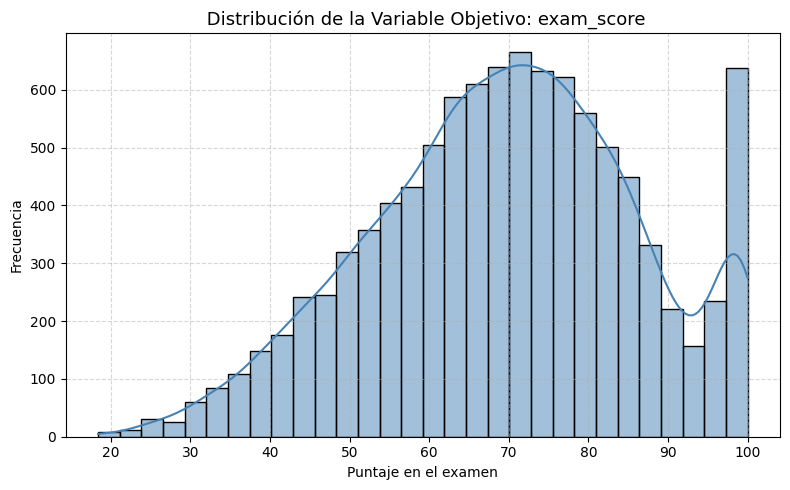

,count,mean,std,min,25%,50%,75%,max
exam_score,10000.00,69.50,16.69,18.40,58.31,70.10,81.14,100.00


In [19]:
# Histograma con curva de densidad
plt.figure(figsize=(8, 5))
sns.histplot(df["exam_score"], bins=30, kde=True, color='steelblue')
plt.title(" Distribución de la Variable Objetivo: exam_score", fontsize=13)
plt.xlabel("Puntaje en el examen")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Tabla resumen estilizada de la variable objetivo
df[["exam_score"]].describe().T.style\
    .set_caption(" Resumen Estadístico de exam_score")\
    .background_gradient(cmap='Blues')\
    .format(precision=2)

 **Análisis**

Se utiliza un **histograma** porque la variable `exam_score` es **numérica y continua**, y esta visualización permite comprender cómo se distribuyen los puntajes en el dataset.

La gráfica muestra:
- La **frecuencia** de estudiantes según su puntaje en el examen.
- Una curva KDE (línea azul) que suaviza la distribución y revela su forma general.
- La posibilidad de identificar **asimetrías**, **concentraciones** de valores, o **outliers**.

Esta información es clave para evaluar si será necesario aplicar alguna **transformación**, como normalización o estandarización, antes de entrenar los modelos de regresión.

### 2.3 Visualización de distribuciones de variables (Regresión)

Se exploran las variables predictoras numéricas a través de histogramas con curva de densidad (KDE). Este análisis visual permite observar posibles sesgos, simetrías o rangos de valores extremos que podrían afectar la calidad del modelo de regresión.

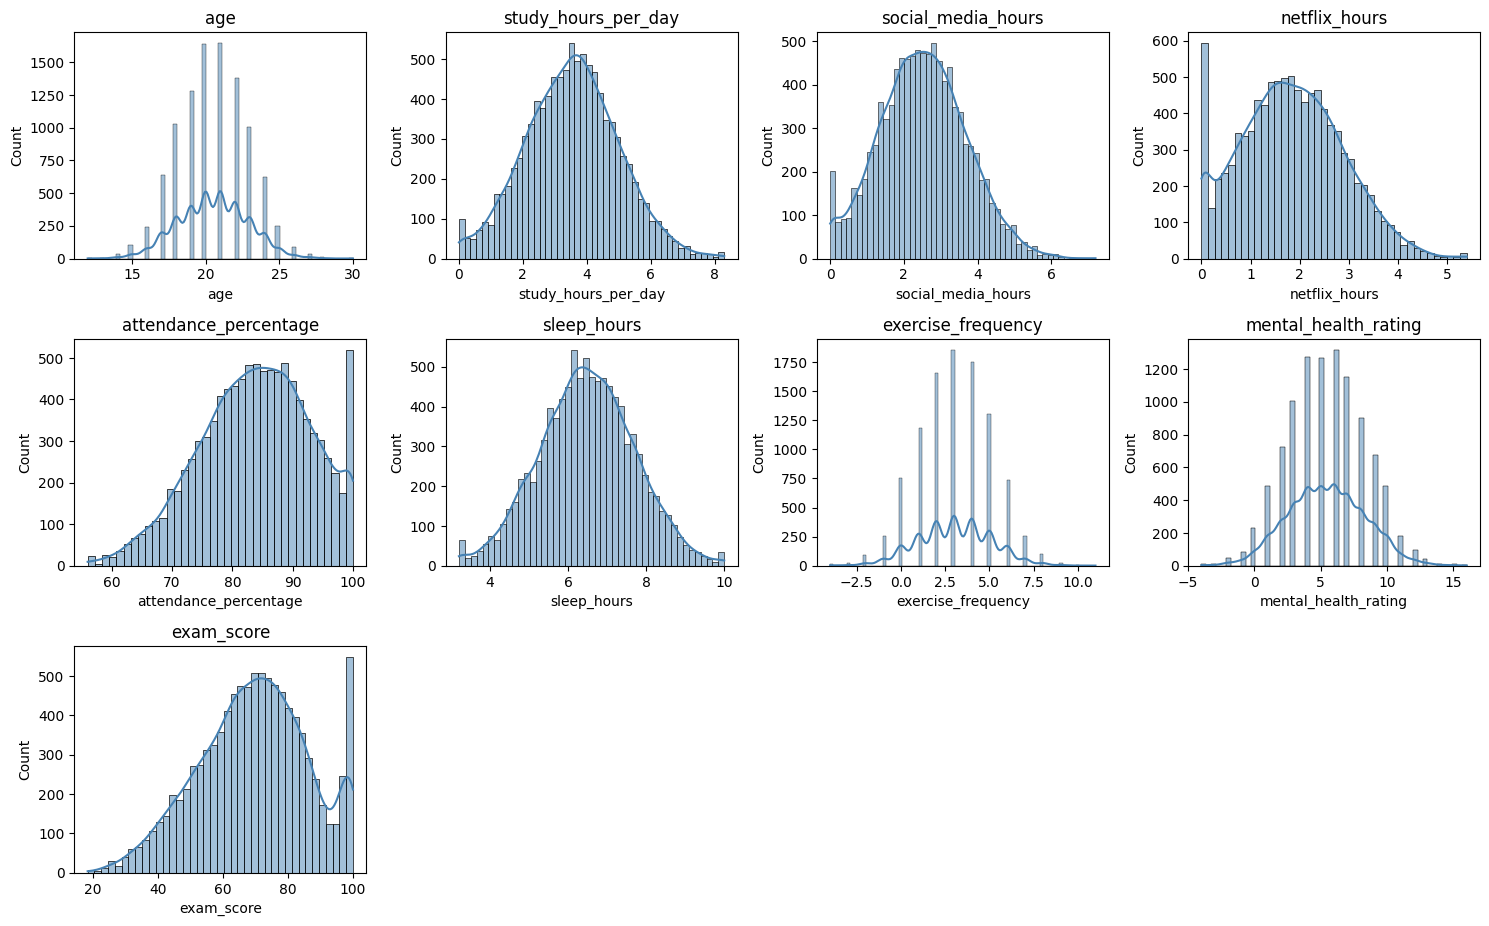

In [21]:
# Selección de columnas numéricas
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Histograma para cada variable numérica
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, color="steelblue")
    plt.title(col)
    plt.tight_layout()


  **Análisis de distribuciones**  
Las gráficas muestran la distribución de cada variable numérica. Se observan los siguientes patrones generales:

- **Distribución normal/aproximada**: Variables como `age`, `sleep_hours`, `mental_health_rating` presentan distribuciones más simétricas.
- **Asimetría positiva o sesgo a la derecha**: Se observa en `study_hours_per_day`, `social_media_hours`, `netflix_hours`, lo cual sugiere que la mayoría estudia/pasa tiempo en redes menos horas, con algunos valores extremos altos.
- **`exercise_frequency`** muestra una distribución discreta con valores enteros. Puede necesitar normalización o ser tratada como ordinal.
- La variable **`exam_score`** presenta una distribución ligeramente sesgada hacia la izquierda (asimetría negativa), con acumulación de valores en torno a los 70-80 puntos, y un pico en 100 (posible efecto de truncamiento o redondeo superior).

Estas observaciones serán útiles para decidir si aplicar transformaciones, escalados o detección de outliers antes del modelado.

### 2.4 Detección de valores atípicos (Regresión)

Al trabajar con regresión, es importante detectar valores extremos en las variables predictoras ya que pueden afectar el ajuste del modelo y distorsionar los coeficientes, especialmente en modelos lineales.

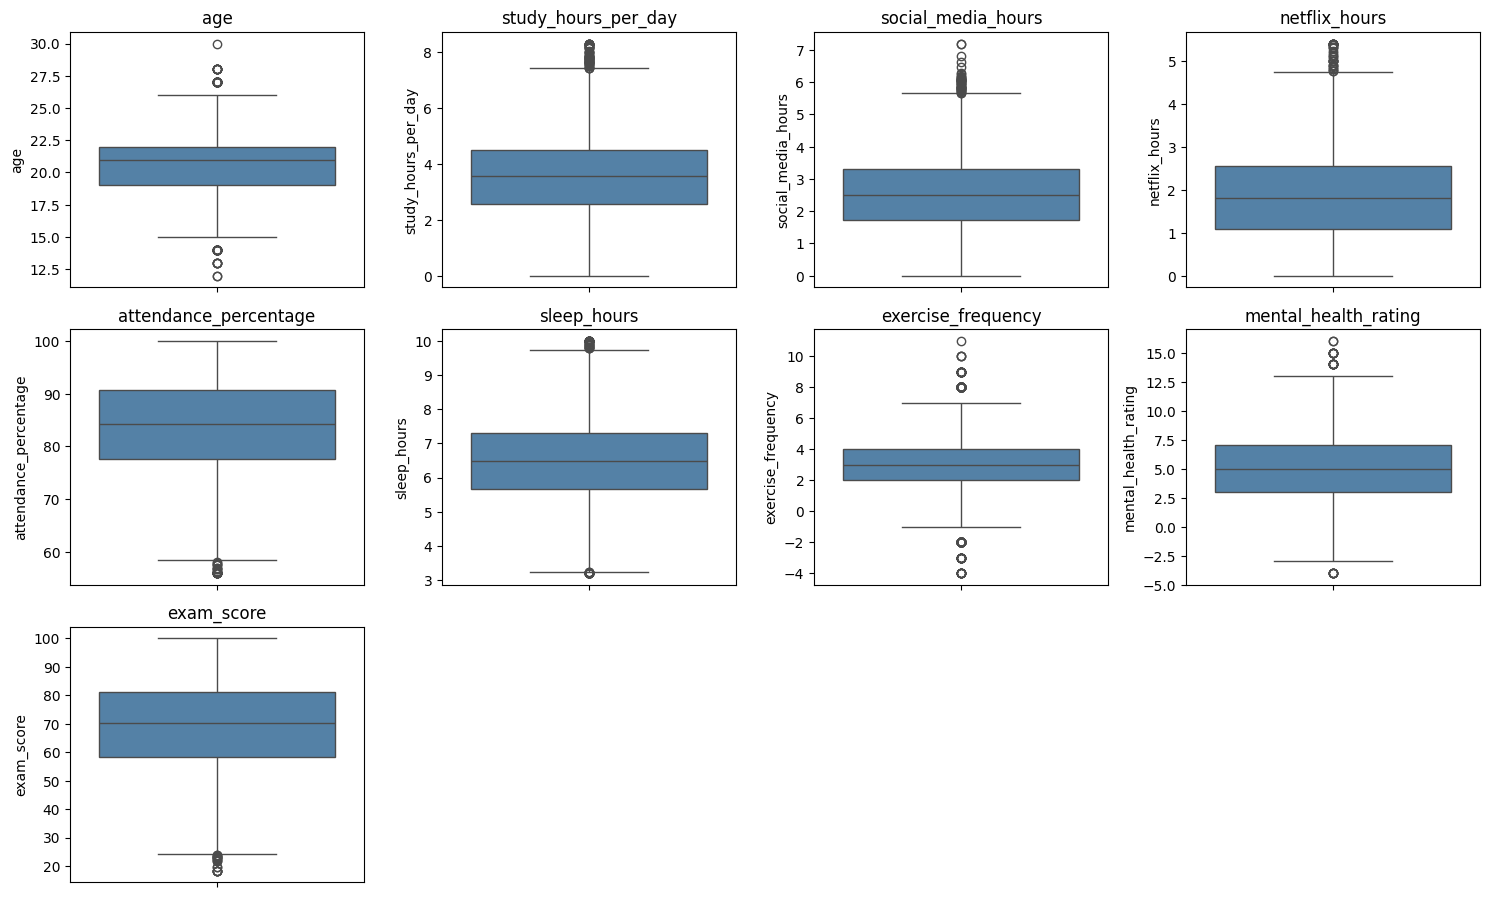

In [22]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col, color="steelblue")
    plt.title(col)
    plt.tight_layout()

 **Análisis**
 
Los boxplots revelan lo siguiente:

Se observan valores atípicos (outliers) especialmente en:

exercise_frequency (valores negativos y por encima de 10)

social_media_hours y netflix_hours (valores altos)

mental_health_rating (valor mínimo fuera del rango esperado)

Estas observaciones podrían requerir tratamiento si afectan la sensibilidad del modelo de regresión.

El resto de las variables presentan una distribución más estable y centrada.

### 2.5 Correlación entre variables (Regresión)

La matriz de correlaciones permite identificar qué variables numéricas están más fuertemente asociadas con `exam_score`, lo cual es clave para la selección de atributos y mejora del modelo.

C:\Users\LORENA SIERRA\AppData\Local\Temp\ipykernel_12404\3709283762.py:6: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\LORENA SIERRA\OneDrive\Desktop\GITHUB\MODELIZADO\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


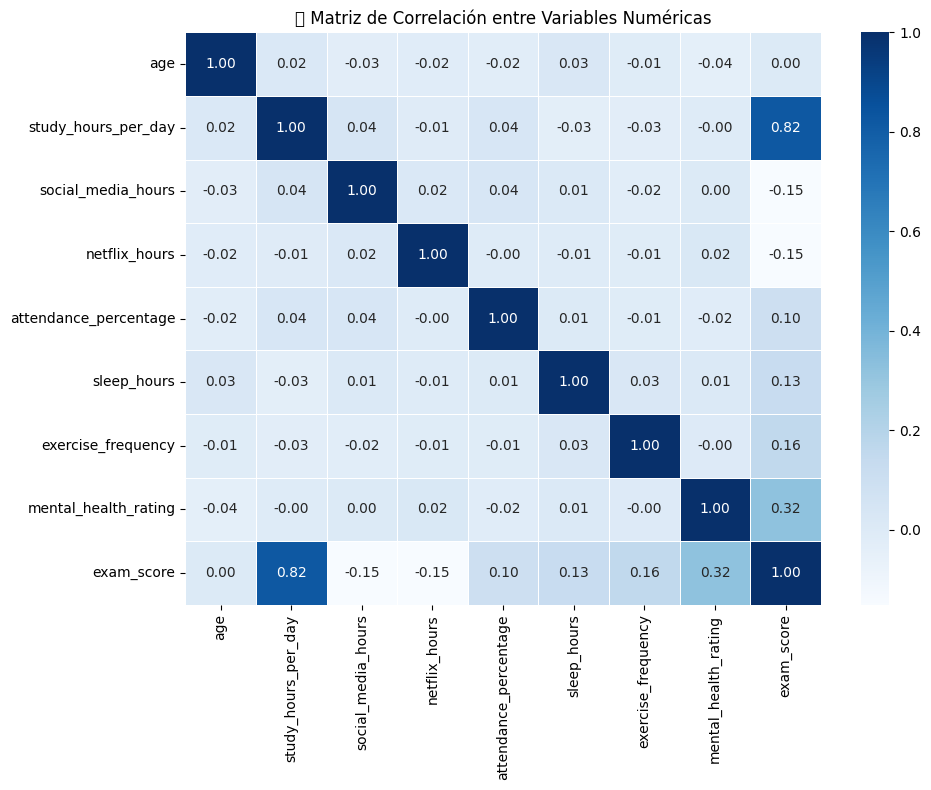

In [23]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=["float64", "int64"]).corr()

sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("🔗 Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()

 **Análisis**

La variable objetivo exam_score tiene correlación positiva más fuerte con:

study_hours_per_day (r = 0.82)

mental_health_rating (r = 0.32)

Variables como social_media_hours y netflix_hours tienen una débil correlación negativa.

En general, la correlación entre predictores es baja, lo que es bueno para evitar colinealidad.

### 2.6 Visualización de la Relación entre Variables Predictoras y `exam_score`

Para examinar visualmente cómo se relacionan las distintas variables numéricas con la variable objetivo `exam_score`, se construyó una matriz de dispersión. Esta herramienta permite identificar patrones de asociación, posibles relaciones lineales o no lineales, y detectar valores atípicos que puedan influir en el modelo de regresión.

En los gráficos obtenidos se observan algunos comportamientos relevantes:

- **`study_hours_per_day`** muestra una clara relación positiva con `exam_score`, indicando que a mayor tiempo de estudio, mayor rendimiento en los exámenes.
- **`mental_health_rating`** también presenta una correlación moderada con el rendimiento, lo cual podría reflejar el impacto del bienestar emocional en el desempeño académico.
- Variables como **`social_media_hours`** o **`netflix_hours`** muestran una tendencia inversa leve o muy dispersa, lo que sugiere que podrían tener un efecto menor o más complejo.

Estas observaciones son clave para la selección de características relevantes en el modelo de regresión que se desarrollará más adelante.

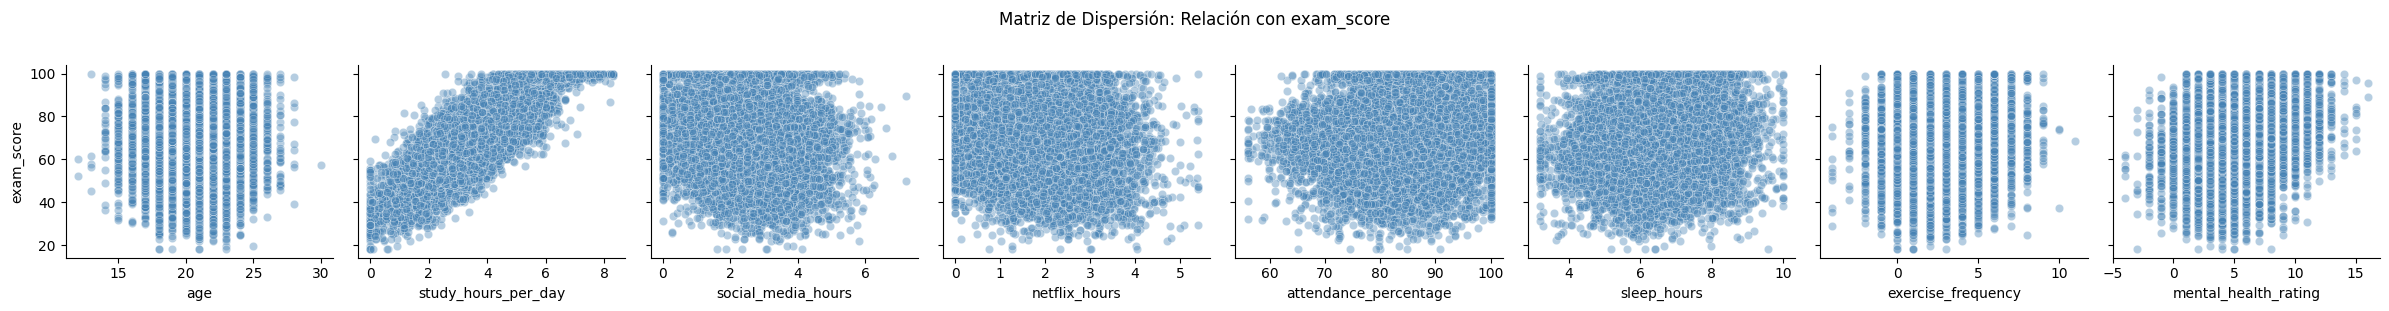

In [24]:
# Selección de variables numéricas
num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
num_cols.remove("exam_score")  # exam_score se coloca como target en y

# Crear pairplot para examinar relación con exam_score
sns.pairplot(df, x_vars=num_cols, y_vars=["exam_score"], height=3, aspect=1, kind="scatter", 
             plot_kws={"alpha":0.4, "color":"steelblue"})
plt.suptitle("Matriz de Dispersión: Relación con exam_score", y=1.02)
plt.tight_layout()
plt.show()

 **Análisis**

La visualización muestra la relación entre las principales variables numéricas predictoras y la variable objetivo exam_score. A partir de esta matriz de dispersión pueden extraerse las siguientes observaciones:

study_hours_per_day es la variable con la asociación más clara y positiva: a mayor cantidad de horas de estudio diario, tienden a observarse puntajes más altos en el examen. Esta relación es visualmente fuerte y consistente, y será clave para el modelo.

mental_health_rating también evidencia una tendencia creciente. Los estudiantes que reportan mejor salud mental tienden a obtener mejores resultados, aunque con mayor dispersión en valores intermedios.

exercise_frequency muestra una relación débilmente positiva con exam_score. Si bien hay más variabilidad, se observa que valores de rendimiento muy bajo son menos frecuentes en quienes reportan mayor frecuencia de ejercicio.

Variables como age, social_media_hours, netflix_hours, attendance_percentage y sleep_hours presentan una nube de puntos más dispersa, sin una relación clara o lineal. Podrían aportar valor combinado en el modelo, pero no de forma aislada.

En resumen, este análisis ayuda a confirmar la inclusión de study_hours_per_day, mental_health_rating y posiblemente exercise_frequency como variables relevantes para la predicción del rendimiento académico, mientras que otras podrían requerir transformación o ser consideradas en interacción con otras variables.

### Regresión – 2.7 Limpieza y Calidad del Dataset

En el caso del dataset de regresión, también se implementaron diversas acciones para asegurar su calidad:

- **Valores nulos:**  
  Los valores faltantes en `parental_education_level` fueron tratados mediante imputación con la categoría `"No declarado"`. La revisión posterior confirmó la ausencia total de valores nulos.

- **Duplicados:**  
  Se corroboró que no existen filas duplicadas dentro del conjunto de datos.

- **Outliers:**  
  A través de los boxplots (sección 2.4), se observaron valores extremos en algunas variables numéricas. No obstante, al tratarse de datos posibles dentro del contexto educativo, se decidió conservarlos sin modificar.

- **Consistencia general:**  
  Los nombres de las columnas son claros, los tipos de datos son adecuados (`int`, `float`, `object`) y no se identificaron errores de carga ni estructuras inconsistentes.

> **Conclusión:** el dataset de regresión se encuentra en **condiciones óptimas para continuar con la fase de modelado**.